Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))

Precisão: 1.0


In [3]:
# EXERCÍCIO 1

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(np.int64)

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree com parâmetros ajustados
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", accuracy_score(y_test, y_pred))

Precisão: 0.8582857142857143


In [4]:
#EXERCÍCIO 1 AJUSTES ADICIONAIS

from sklearn.model_selection import GridSearchCV

# Definir os parâmetros para grid search
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Criar o modelo de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Treinar o modelo com grid search
grid_search.fit(X_train, y_train)

# Melhor combinação de parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Prever as classes para o conjunto de teste com o melhor modelo
y_pred = grid_search.best_estimator_.predict(X_test)

# Imprimir a precisão do melhor modelo
print("Precisão:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   6.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   6.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   6.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   6.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   6.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   6.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20; total time=   6.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20; total time=   6.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20; total time=   6.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   6.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   6.3

/home/codespace/.local/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores parâmetros: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Precisão: 0.8734285714285714


In [5]:
# EXERCÍCIO 2

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Carregar o conjunto de dados MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(np.int64)

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Precisão Decision Tree:", dt_accuracy)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Precisão Random Forest:", rf_accuracy)

# XGBoost
xgb_clf = xgb.XGBClassifier(max_depth=10, n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Precisão XGBoost:", xgb_accuracy)


Precisão Decision Tree: 0.8582857142857143
Precisão Random Forest: 0.9439285714285715


/home/codespace/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:41:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Precisão XGBoost: 0.974


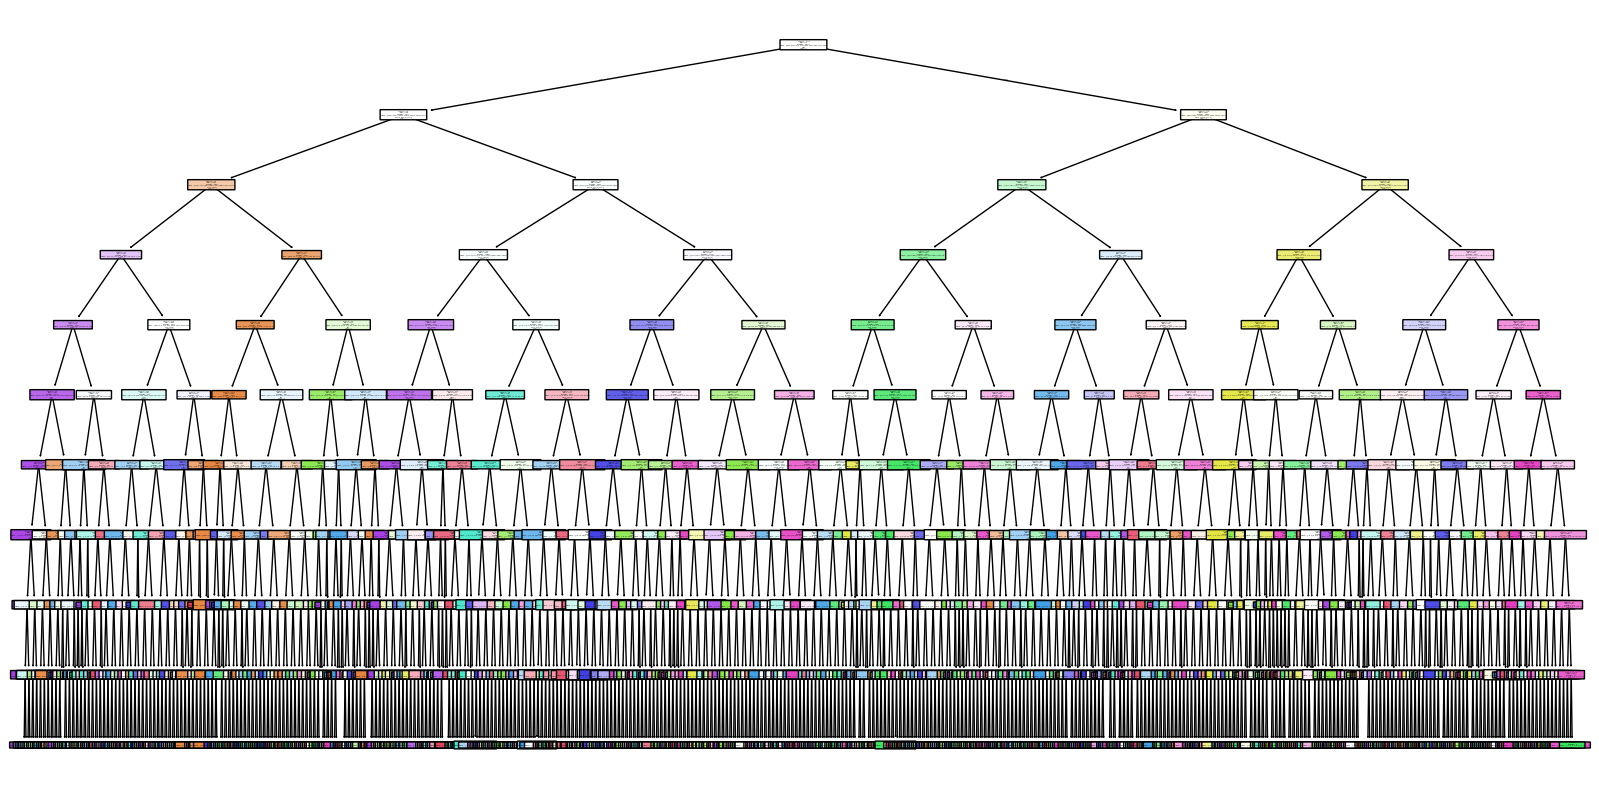

In [7]:
# EXERCÍCIO 3
# Visualização da Árvore de Decisão

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Lista de nomes das classes para MNIST (dígitos de 0 a 9)
class_names = [str(i) for i in range(10)]

# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=None, class_names=class_names, rounded=True)
plt.show()



In [8]:
# EXERCICIO 3 CONTINUACAO
# Cálculo da Medida de Impureza para Diferentes Conjuntos

import numpy as np

# Suponha que temos as seguintes proporções de classes em um nó
class_counts = np.array([40, 10, 50])  # Exemplo: 40% classe 0, 10% classe 1, 50% classe 2
class_proportions = class_counts / np.sum(class_counts)

# Cálculo do índice de Gini
gini = 1 - np.sum(class_proportions**2)
print(f"Índice de Gini: {gini}")

# Cálculo da Entropia
entropy = -np.sum(class_proportions * np.log2(class_proportions))
print(f"Entropia: {entropy}")


Índice de Gini: 0.58
Entropia: 1.360964047443681
